In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
item_cat = pd.read_csv("D:\\Kaggle Notebook\\Stroke Prediction\\item_categories.csv")
item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [11]:
item_cat.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [5]:
item_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [13]:
item_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [14]:
df.duplicated().sum()

0

In [16]:
item_cat['item_category_name'].nunique()

84

In [18]:
item = pd.read_csv("D:\\Kaggle Notebook\\Stroke Prediction\\items.csv\\items.csv")
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [19]:
item['item_name'].describe()

count                                                 22170
unique                                                22170
top       Футболка Starcraft II Terran Vintage Logo черн...
freq                                                      1
Name: item_name, dtype: object

In [25]:
X = item.iloc[:,[1,2]].values


In [26]:
X

array([[    0,    40],
       [    1,    76],
       [    2,    40],
       ...,
       [22167,    49],
       [22168,    62],
       [22169,    69]], dtype=int64)

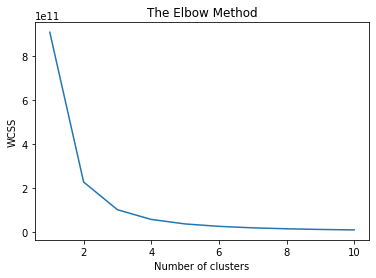

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

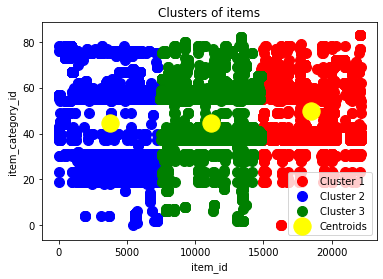

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X_[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X_[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X_[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of items')
plt.xlabel('item_id')
plt.ylabel('item_category_id')
plt.legend()
plt.show()

# EDA for Sales_train

In [32]:
Sales_train = pd.read_csv("D:\\Kaggle Notebook\\Stroke Prediction\\sales_train.csv\\sales_train.csv")
Sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [33]:
Sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [34]:
Sales_train.isna().count

<bound method DataFrame.count of           date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0        False           False    False    False       False         False
1        False           False    False    False       False         False
2        False           False    False    False       False         False
3        False           False    False    False       False         False
4        False           False    False    False       False         False
...        ...             ...      ...      ...         ...           ...
2935844  False           False    False    False       False         False
2935845  False           False    False    False       False         False
2935846  False           False    False    False       False         False
2935847  False           False    False    False       False         False
2935848  False           False    False    False       False         False

[2935849 rows x 6 columns]>

In [35]:
Sales_train['shop_id'].unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

In [36]:
Sales_train['shop_id'].describe()

count    2.935849e+06
mean     3.300173e+01
std      1.622697e+01
min      0.000000e+00
25%      2.200000e+01
50%      3.100000e+01
75%      4.700000e+01
max      5.900000e+01
Name: shop_id, dtype: float64

In [37]:
Sales_train['shop_id'].unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

In [38]:
Sales_train[Sales_train['shop_id']== 25]['date']

1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
5          10.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 186104, dtype: object

In [39]:
shops=pd.read_csv("D:\\Kaggle Notebook\\Stroke Prediction\\shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [40]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [41]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [44]:
test=pd.read_csv("D:\\Kaggle Notebook\\Stroke Prediction\\test.csv\\test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [45]:
test['item_id'].nunique()

5100

# Predict the item price of test data based on the sales_train data

In [46]:
 
X_Train=Sales_train.iloc[:,[2,3]]
Y_train=Sales_train.iloc[:,[4]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_train, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = regressor.predict(X_test)
y_pred
(y_pred,y_test.values)

(array([[ 766.9858339 ],
        [ 993.4548818 ],
        [ 508.87367498],
        ...,
        [ 742.31671373],
        [ 612.83467251],
        [1218.91296002]]),
 array([[ 999. ],
        [ 799. ],
        [ 169. ],
        ...,
        [ 198.4],
        [ 479. ],
        [2999. ]]))

In [49]:
X_test_test=test.iloc[:,[1,2]]

In [51]:
X_test_test

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [53]:
y_pred_final = regressor.predict(X_test_test)
y_pred_final

print("The price prediction of the test data")
pd.DataFrame(y_pred_final)

The price prediction of the test data


,0
0,1139.621261
1,1129.256619
2,1132.442922
3,1132.479546
4,1131.161076
...,...
214195,562.389029
214196,645.379415
214197,661.164435
214198,518.659762


In [54]:
X_tr=Sales_train.iloc[:,[2,3]]
Y_Tr=Sales_train.iloc[:,[5]]
from sklearn.model_selection import train_test_split
X_Train, X_test, y_train, y_test = train_test_split(X_tr, Y_Tr, test_size = 0.2, random_state = 0)

In [55]:
model = LinearRegression()
model.fit(X_Train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_prediction_training_data= model.predict(X_test)
y_prediction_training_data


array([[1.26815737],
       [1.23459393],
       [1.30102213],
       ...,
       [1.23899617],
       [1.29629087],
       [1.20639399]])

In [57]:
y_prediction_training_data,y_test

(array([[1.26815737],
        [1.23459393],
        [1.30102213],
        ...,
        [1.23899617],
        [1.29629087],
        [1.20639399]]),
          item_cnt_day
 2633591           1.0
 1077216           2.0
 2673709           1.0
 880503            1.0
 893057            1.0
 ...               ...
 2108425           1.0
 1733599           1.0
 1898131           1.0
 2784500           2.0
 2325317           1.0
 
 [587170 rows x 1 columns])

In [58]:
Y_prediction_from_test_data = model.predict(X_test_test)
Y_prediction_from_test_data

array([[1.23381268],
       [1.23570429],
       [1.23512277],
       ...,
       [1.26934392],
       [1.29535186],
       [1.17049903]])

## Predict The Future Sales Using Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_tr, Y_Tr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [60]:
y_predict= regressor.predict(X_test)
y_predict

array([1.06666667, 1.62445415, 1.        , ..., 1.        , 1.625     ,
       1.        ])

In [62]:
y_predict,y_test

(array([1.06666667, 1.62445415, 1.        , ..., 1.        , 1.625     ,
        1.        ]),
          item_cnt_day
 2633591           1.0
 1077216           2.0
 2673709           1.0
 880503            1.0
 893057            1.0
 ...               ...
 2108425           1.0
 1733599           1.0
 1898131           1.0
 2784500           2.0
 2325317           1.0
 
 [587170 rows x 1 columns])

In [63]:
y_predict_DR= regressor.predict(X_test_test)

In [64]:
submission = pd.DataFrame({'ID':test['ID'],'item_cnt_month':y_predict_DR.ravel()})
submission['item_cnt_month'] = submission['item_cnt_month']
submission.to_csv('submission.csv',index = False)